In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('BPD_Arrests.csv')

In [5]:
print(df.head())

       Arrest   Age Sex Race  ArrestDate ArrestTime    ArrestLocation  \
0  16160529.0  54.0   M    B  11/12/2016      22:35   3500 PELHAM AVE   
1  16160490.0  22.0   M    B  11/12/2016      21:49  300 S LOUDON AVE   
2  16160487.0  31.0   M    B  11/12/2016      21:40               NaN   
3  16160485.0  31.0   M    B  11/12/2016      20:30               NaN   
4  16160481.0  33.0   M    B  11/12/2016      19:45               NaN   

    IncidentOffense  IncidentLocation  Charge          ChargeDescription  \
0  4ECOMMON ASSAULT   3500 PELHAM AVE  1 1415             COMMON ASSAULT   
1   Unknown Offense  300 S LOUDON AVE  4 3550                 POSSESSION   
2   Unknown Offense               NaN  1 0077          FAILURE TO APPEAR   
3   Unknown Offense               NaN  1 0077          FAILURE TO APPEAR   
4   Unknown Offense               NaN  2 0480  MOTOR VEH/UNLAWFUL TAKING   

       District   Post   Neighborhood                       Location 1  
0  Northeastern  432.0  Belair-

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130713 entries, 0 to 130712
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Arrest             123699 non-null  float64
 1   Age                130685 non-null  float64
 2   Sex                130713 non-null  object 
 3   Race               130713 non-null  object 
 4   ArrestDate         130713 non-null  object 
 5   ArrestTime         130713 non-null  object 
 6   ArrestLocation     78595 non-null   object 
 7   IncidentOffense    130713 non-null  object 
 8   IncidentLocation   76987 non-null   object 
 9   Charge             114255 non-null  object 
 10  ChargeDescription  130211 non-null  object 
 11  District           78601 non-null   object 
 12  Post               78583 non-null   float64
 13  Neighborhood       78595 non-null   object 
 14  Location 1         78666 non-null   object 
dtypes: float64(3), object(12)
memory usage: 15.0+ MB
No

In [7]:
print(df.describe(include='all'))

              Arrest            Age     Sex    Race  ArrestDate ArrestTime  \
count   1.236990e+05  130685.000000  130713  130713      130713     130713   
unique           NaN            NaN       2       5        1412       2313   
top              NaN            NaN       M       B  08/15/2013      19:00   
freq             NaN            NaN  105837  106652         186       2063   
mean    1.452468e+07      32.969384     NaN     NaN         NaN        NaN   
std     8.703409e+05      11.589867     NaN     NaN         NaN        NaN   
min     1.361038e+07       0.000000     NaN     NaN         NaN        NaN   
25%     1.376077e+07      24.000000     NaN     NaN         NaN        NaN   
50%     1.412063e+07      30.000000     NaN     NaN         NaN        NaN   
75%     1.512349e+07      41.000000     NaN     NaN         NaN        NaN   
max     1.616053e+07     100.000000     NaN     NaN         NaN        NaN   

        ArrestLocation  IncidentOffense IncidentLocation  Charg

In [8]:
# WIKIPEDIA:
# ==========

# 640.000 la ciudad
# 2.700.000 área metropolitana

# Composición racial de la ciudad es de:  64,85% afroamericanos; 
#                                         31,28% blancos;
#                                          1,70% hispanos
#                                          1,53% asiáticos; 
#                                          0,32% amerindios; 
#                                          0,03% isleños del Pacífico; 
#                                          0,29% de otras razas;
                        
# * tenemos un 60% de las localizaciones (barrio, código postal) de los arrestos pero no sabemos el orígen de los detenidos
# * tampoco sabemos si los detenidos fueron finalmente condenados

In [9]:
# Limpieza de Datos 

# Valores faltantes (eliminación, relleno,...)
# Formato de la fecha y las horas (pd.to_datetime)
# Revisar que datos como raza, sexo, tipo de delito esten estandarizados (pd.str.upper())

In [10]:
# Eliminar filas con 'Unknown Offense'
# df = df[df['IncidentOffense'] != 'Unknown Offense']

# Eliminar filas con cualquier NaN en cualquier columna
# df = df.dropna()

# Verificar el DataFrame resultante
print(df.head())

       Arrest   Age Sex Race  ArrestDate ArrestTime    ArrestLocation  \
0  16160529.0  54.0   M    B  11/12/2016      22:35   3500 PELHAM AVE   
1  16160490.0  22.0   M    B  11/12/2016      21:49  300 S LOUDON AVE   
2  16160487.0  31.0   M    B  11/12/2016      21:40               NaN   
3  16160485.0  31.0   M    B  11/12/2016      20:30               NaN   
4  16160481.0  33.0   M    B  11/12/2016      19:45               NaN   

    IncidentOffense  IncidentLocation  Charge          ChargeDescription  \
0  4ECOMMON ASSAULT   3500 PELHAM AVE  1 1415             COMMON ASSAULT   
1   Unknown Offense  300 S LOUDON AVE  4 3550                 POSSESSION   
2   Unknown Offense               NaN  1 0077          FAILURE TO APPEAR   
3   Unknown Offense               NaN  1 0077          FAILURE TO APPEAR   
4   Unknown Offense               NaN  2 0480  MOTOR VEH/UNLAWFUL TAKING   

       District   Post   Neighborhood                       Location 1  
0  Northeastern  432.0  Belair-

In [11]:
df['ArrestDate'] = pd.to_datetime(df['ArrestDate'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130713 entries, 0 to 130712
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Arrest             123699 non-null  float64       
 1   Age                130685 non-null  float64       
 2   Sex                130713 non-null  object        
 3   Race               130713 non-null  object        
 4   ArrestDate         130713 non-null  datetime64[ns]
 5   ArrestTime         130713 non-null  object        
 6   ArrestLocation     78595 non-null   object        
 7   IncidentOffense    130713 non-null  object        
 8   IncidentLocation   76987 non-null   object        
 9   Charge             114255 non-null  object        
 10  ChargeDescription  130211 non-null  object        
 11  District           78601 non-null   object        
 12  Post               78583 non-null   float64       
 13  Neighborhood       78595 non-null   object  

In [13]:
# Visualizaciones básicas

In [14]:
# Detenciones por año (countplot)

# Detenciones por sexo (countplot)
# Detenciones por raza (countplot)
# Detenciones por edad (countplot)
# Detenciones por barrio o código postal (countplot)

# ---> Combinaciones múltiples (edad, raza, sexo, barrio)

# Mapa de calor de detenciones por barrio o código postal (heatmap) (choroplex de la ciudad)

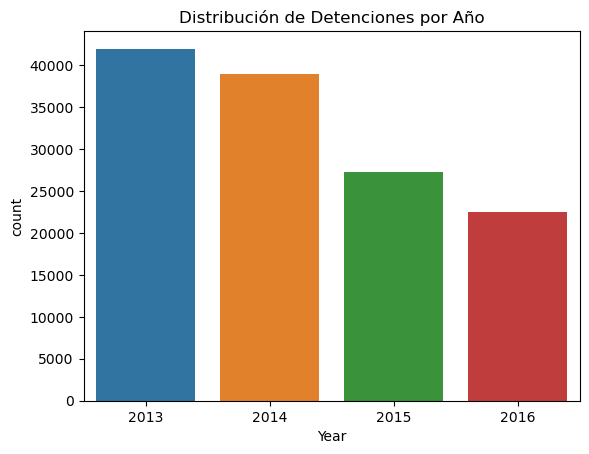

In [15]:
df['Year'] = df['ArrestDate'].dt.year
sns.countplot(data=df, x='Year')
plt.title('Distribución de Detenciones por Año')
plt.show()

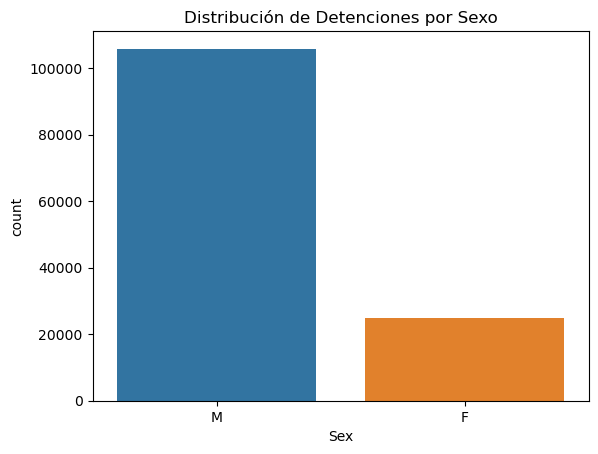

In [16]:
sns.countplot(data=df, x='Sex')
plt.title('Distribución de Detenciones por Sexo')
plt.show()

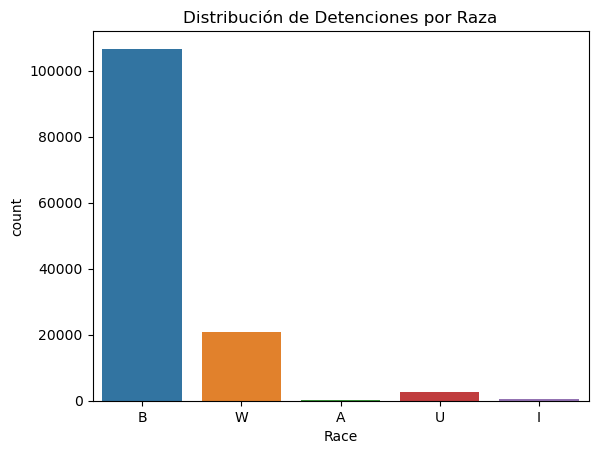

In [17]:
sns.countplot(data=df, x='Race')
plt.title('Distribución de Detenciones por Raza')
plt.show()


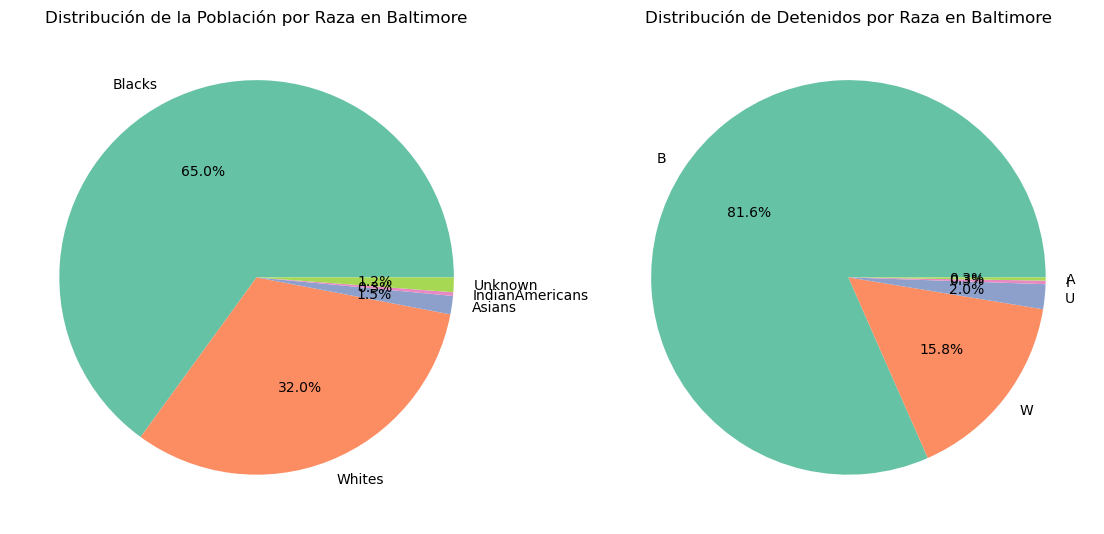

In [18]:
# Datos de la población de Baltimore por raza
population_data = {
    'Race': ['Blacks', 'Whites', 'Asians', 'IndianAmericans', 'Unknown'],
    'Percentage': [65, 32, 1.5, 0.3, 1.2]
}

# Crear un DataFrame para los datos de la población
population_df = pd.DataFrame(population_data)

# Contar el número de detenidos por raza en el DataFrame df
detained_counts = df['Race'].value_counts(normalize=True) * 100

# Datos de detenidos por raza
detained_data = {
    'Race': detained_counts.index,
    'Percentage': detained_counts.values
}

# Crear un DataFrame para los datos de los detenidos
detained_df = pd.DataFrame(detained_data)

# Crear gráficos de pastel
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de pastel para la población
axs[0].pie(population_df['Percentage'], labels=population_df['Race'], autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axs[0].set_title('Distribución de la Población por Raza en Baltimore')

# Gráfico de pastel para los detenidos
axs[1].pie(detained_df['Percentage'], labels=detained_df['Race'], autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axs[1].set_title('Distribución de Detenidos por Raza en Baltimore')

plt.show()

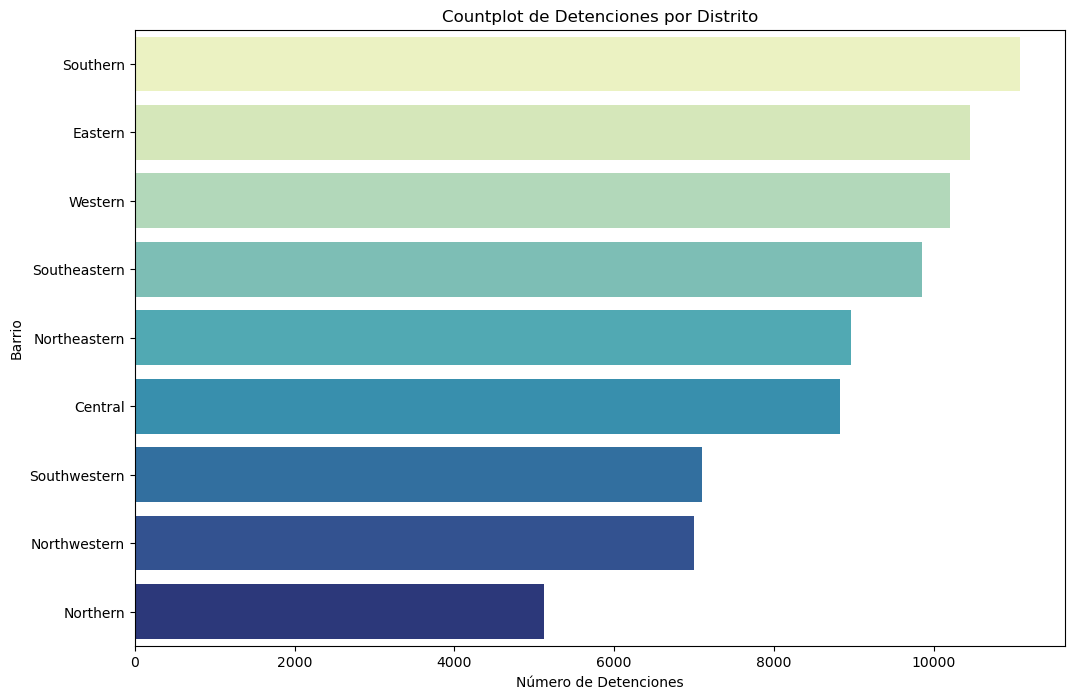

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='District', order=df['District'].value_counts().index, palette='YlGnBu')
plt.title('Countplot de Detenciones por Distrito')
plt.xlabel('Número de Detenciones')
plt.ylabel('Barrio')
plt.show()

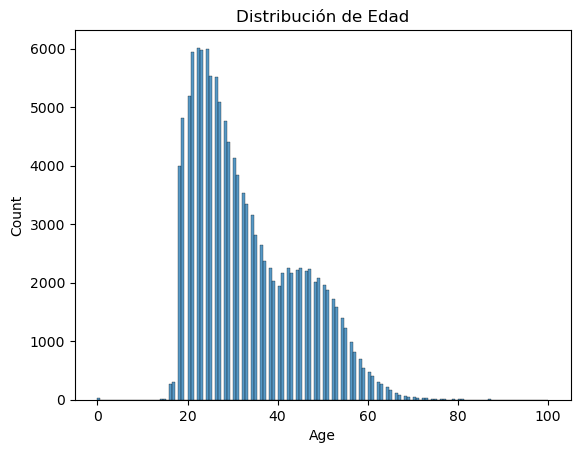

In [20]:
## Distribuciones de las características numéricas
sns.histplot(data=df, x='Age')
plt.title('Distribución de Edad')
plt.show()

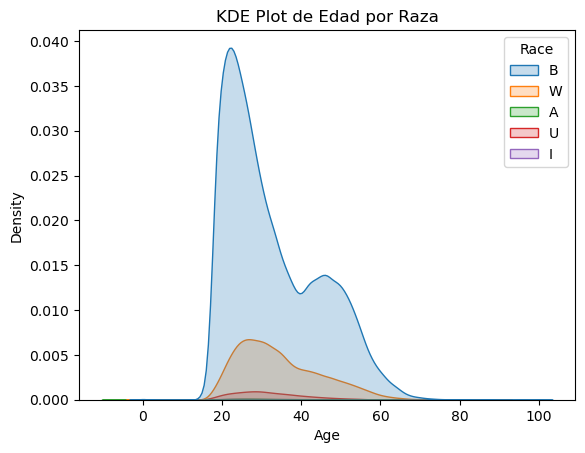

In [21]:
# KDE plots para ver densidades de edad por raza
sns.kdeplot(data=df, x='Age', hue='Race', fill=True)
plt.title('KDE Plot de Edad por Raza')
plt.show()

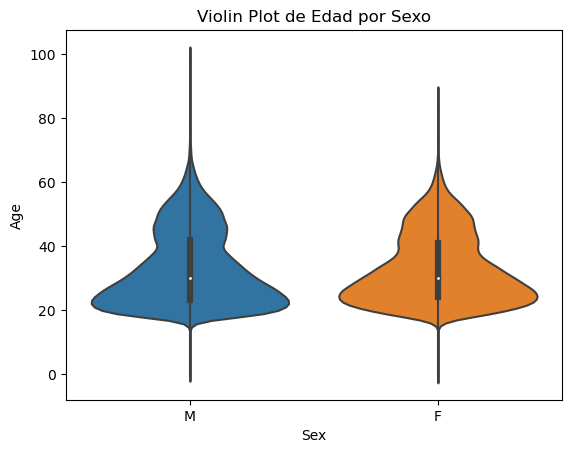

In [22]:
# Violin plots para ver distribución y densidad de edad por sexo
sns.violinplot(data=df, x='Sex', y='Age')
plt.title('Violin Plot de Edad por Sexo')
plt.show()

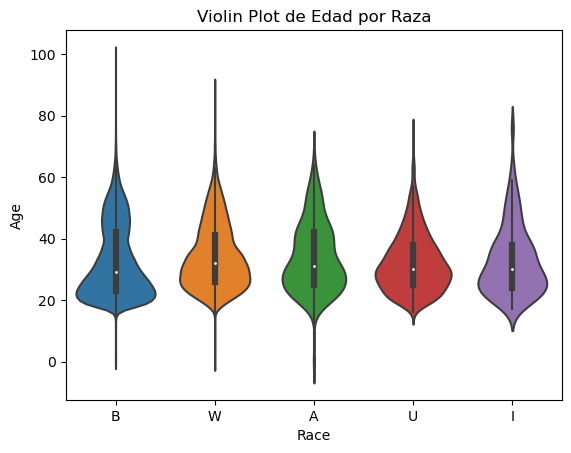

In [23]:
# Violin plots para ver distribución y densidad de edad por raza
sns.violinplot(data=df, x='Race', y='Age')
plt.title('Violin Plot de Edad por Raza')
plt.show()

In [24]:
# Análisis Temporal más detallado

In [25]:
# Detenciones por mes (countplot)
# Detenciones por dia (countplot)
# Detenciones por hora (countplot)

# Detenciones por hecho delictivo (countplot)
# Detenciones por barrio o código postal (countplot)

# ---> Combinaciones múltiples (edad, raza, sexo, barrio)

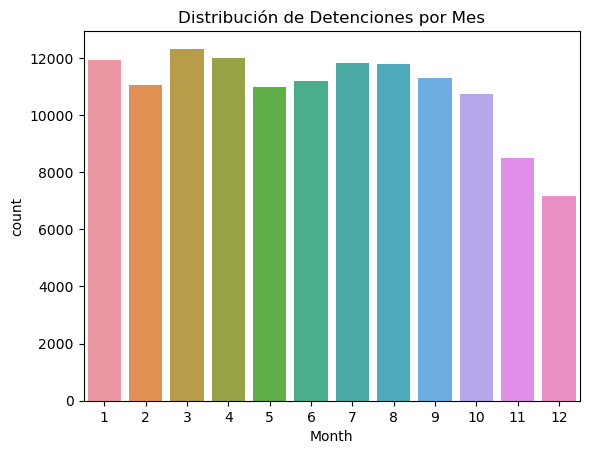

In [26]:
df['Month'] = df['ArrestDate'].dt.month
sns.countplot(data=df, x='Month')
plt.title('Distribución de Detenciones por Mes')
plt.show()

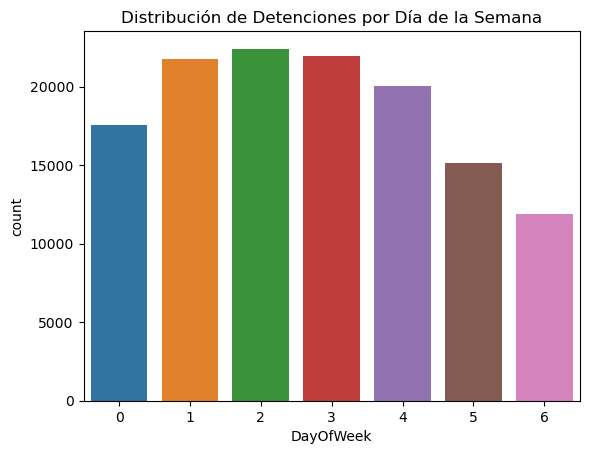

In [27]:
df['DayOfWeek'] = df['ArrestDate'].dt.dayofweek
sns.countplot(data=df, x='DayOfWeek')
plt.title('Distribución de Detenciones por Día de la Semana')
plt.show()

In [95]:
# Crear un diccionario para mapear los delitos a las nuevas categorías
category_mapping = {
'102-QUESTIONAL DEATH': 'Violent Crimes',
'103-DEAD ON ARRIVAL': 'Violent Crimes',
'105-SUSPICIOUS BURNING': 'Violent Crimes',
'106-CUSTODY DISPUTE': 'Violent Crimes',
'107-DRUNKENNESS': 'Violent Crimes',
'108-LIQUOR LAW/OPEN CONTA': 'Alcohol Violations',
'108-LIQUOR LAW/OPEN CONTAIN': 'Alcohol Violations',
'108-LIQUOR LAW/OPEN CONTAINE': 'Alcohol Violations',
'109-LOITERING': 'Public Order Crimes',
'110-SUMMONS SERVED': 'Administrative',
'111-PROTECTIVE ORD': 'Domestic Crimes',
'111-PROTECTIVE ORDER': 'Domestic Crimes',
'112-TRAFFIC RELATE': 'Traffic Violations',
'112-TRAFFIC RELATED INCID': 'Traffic Violations',
'112-TRAFFIC RELATED INCIDEN': 'Traffic Violations',
'112-TRAFFIC RELATED INCIDENT': 'Traffic Violations',
'113-LITTERING': 'Environmental Violations',
'114-HINDERING': 'Obstruction of Justice',
'115-TRESPASSING': 'Property Crimes',
'115TRESPASSING': 'Property Crimes',
'116-PUBLIC URINATION / DEFE': 'Public Order Crimes',
'116-PUBLIC URINATION / DEFEC': 'Public Order Crimes',
'117-FTO': 'Administrative',
'117FTO': 'Administrative',
'118-BURGLARY - FOURTH DEG': 'Property Crimes',
'118-BURGLARY - FOURTH DEGRE': 'Property Crimes',
'118-BURGLARY - FOURTH DEGREE': 'Property Crimes',
'118BURGLARY - FOURTH DEGREE': 'Property Crimes',
'119-ISSUED IN ERROR': 'Administrative',
'119ISSUED IN ERROR': 'Administrative',
'1A-MURDER': 'Violent Crimes',
'1AMURDER': 'Violent Crimes',
'20A-FOLLOWUP': 'Investigations',
'20H-TRAFFIC CONTROL': 'Traffic Violations',
'23-UNAUTHORIZED US': 'Property Crimes',
'23-UNAUTHORIZED USE': 'Property Crimes',
'23UNAUTHORIZED USE': 'Property Crimes',
'24P-TOWED VEHICLE - PRIVATE': 'Traffic Violations',
'24TOWED VEHICLE': 'Traffic Violations',
'26-RECOVERED VEHICLE': 'Property Crimes',
'26RECOVERED VEHICLE': 'Property Crimes',
'29-DRIVING WHILE INTOXICATED': 'Traffic Violations',
'2A-RAPE (FORCE)': 'Sex Crimes',
'2ARAPE (FORCE)': 'Sex Crimes',
'2B-RAPE (ATTEMPT)': 'Sex Crimes',
'2C-CARNAL KNOWLEDGE': 'Sex Crimes',
'2D-STATUTORY RAPE': 'Sex Crimes',
'2F-PLACING HANDS': 'Sex Crimes',
'2FPLACING HANDS': 'Sex Crimes',
'2G-SODOMY/PERVERSON': 'Sex Crimes',
'2H-INDECENT EXP.': 'Sex Crimes',
'OTHER SEX OFFN.': 'Sex Crimes',
'33-PARKING COMPLAINT': 'Traffic Violations',
'39-FIRE': 'Fire Incidents',
'33AF-ROBB HWY-FIREARM': 'Robbery',
'3AFROBB HWY-FIREARM': 'Robbery',
'3AJF-ROBB CARJACK-FIREARM': 'Robbery',
'3AJFROBB CARJACK-FIREARM': 'Robbery',
'3AJK-ROBB CARJACK-KNIFE': 'Robbery',
'3AJO-ROBB CARJACK-OTHER WPN': 'Robbery',
'3AJOROBB CARJACK-OTHER WPN': 'Robbery',
'3AK-ROBB HWY-KNIFE': 'Robbery',
'3AKROBB HWY-KNIFE': 'Robbery',
'3AO-ROBB HWY-OTHER WPN': 'Robbery',
'3AOROBB HWY-OTHER WPN': 'Robbery',
'3B-ROBB HIGHWAY (UA)': 'Robbery',
'3BJ-ROBB CARJACK(UA)': 'Robbery',
'3BJROBB CARJACK(UA)': 'Robbery',
'3BROBB HIGHWAY (UA)': 'Robbery',
'3CF-ROBB COMM-FIREARM': 'Robbery',
'3CFROBB COMM-FIREARM': 'Robbery',
'3CK-ROBB COMM-KNIFE': 'Robbery',
'3CKROBB COMM-KNIFE': 'Robbery',
'3CO-ROBB COMM-OTHER WPN': 'Robbery',
'3COROBB COMM-OTHER WPN': 'Robbery',
'3D-ROBB COMM. (UA)': 'Robbery',
'3DROBB COMM. (UA)': 'Robbery',
'3EK-ROBB GAS STATION-KNIFE': 'Robbery',
'3EO-ROBB GAS STATION-OTHER W': 'Robbery',
'3F-ROBB GAS STA. (UA)': 'Robbery',
'3GF-ROBB CONV STORE-FIREARM': 'Robbery',
'3GO-ROBB CONV STORE-OTHER WP': 'Robbery',
'3H-ROBB CONV. STOR.(UA)': 'Robbery',
'3HROBB CONV. STOR.(UA)': 'Robbery',
'3JF-ROBB RESIDENCE-FIRE': 'Robbery',
'3JF-ROBB RESIDENCE-FIREARM': 'Robbery',
'3JFROBB RESIDENCE-FIREARM': 'Robbery',
'3JK-ROBB RESIDENCE-KNIFE': 'Robbery',
'3JKROBB RESIDENCE-KNIFE': 'Robbery',
'3JO-ROBB RESIDENCE-OTHER WPN': 'Robbery',
'3JOROBB RESIDENCE-OTHER WPN': 'Robbery',
'3K-ROBB RES. (UA)': 'Robbery',
'3KROBB RES. (UA)': 'Robbery',
'3LF-ROBB BANK-FIREARM': 'Robbery',
'3LO-ROBB BANK-OTHER WPN': 'Robbery',
'3M-ROBB BANK (UA)': 'Robbery',
'3NF-ROBB MISC-FIREARM': 'Robbery',
'3NFROBB MISC-FIREARM': 'Robbery',
'3NK-ROBB MISC-KNIFE': 'Robbery',
'3NO-ROBB MISC-OTHER WPN': 'Robbery',
'3NOROBB MISC-OTHER WPN': 'Robbery',
'3P-ROBB MISC. (UA)': 'Robbery',
'3PROBB MISC. (UA)': 'Robbery',
'41-HUMAN TRAFFICKING': 'Human Trafficking',
'48-INVOLUNTARY DETENTIO': 'Administrative',
'48-INVOLUNTARY DETENTION': 'Administrative',
'49-FAMILY DISTURBA': 'Domestic Crimes',
'49-FAMILY DISTURBANCE': 'Domestic Crimes',
'49FAMILY DISTURBANCE': 'Domestic Crimes',
'4A-AGG. ASSLT.- GU': 'Violent Crimes',
'4A-AGG. ASSLT.- GUN': 'Violent Crimes',
'4AAGG. ASSLT.- GUN': 'Violent Crimes',
'4B-AGG. ASSLT.- CU': 'Violent Crimes',
'4B-AGG. ASSLT.- CUT': 'Violent Crimes',
'4BAGG. ASSLT.- CUT': 'Violent Crimes',
'4C-AGG. ASSLT.- OT': 'Violent Crimes',
'4C-AGG. ASSLT.- OTH.': 'Violent Crimes',
'4CAGG. ASSLT.- OTH.': 'Violent Crimes',
'4D-AGG. ASSLT.- HA': 'Violent Crimes',
'4D-AGG. ASSLT.- HAND': 'Violent Crimes',
'4DAGG. ASSLT.- HAND': 'Violent Crimes',
'4E-COMMON ASSAULT': 'Violent Crimes',
'4ECOMMON ASSAULT': 'Violent Crimes',    
'4F-ASSAULT BY THRE': 'Violent Crimes',
'4F-ASSAULT BY THREAT': 'Violent Crimes',
'4FASSAULT BY THREAT': 'Violent Crimes',
'52A-ANIMAL CRUELTY': 'Animal Crimes',
'54-ARMED PERSON': 'Weapons Violations',
'54ARMED PERSON': 'Weapons Violations',
'55-DISORDERLY PERSON': 'Public Order Crimes',
'55DISORDERLY PERSON': 'Public Order Crimes',
'55A-PROSTITUTION': 'Sex Crimes',
'56-MISSING PERSON': 'Investigations',
'58-INJURED PERSON': 'Medical Emergencies',
'58INJURED PERSON': 'Medical Emergencies',
'59-INTOXICATED PERSON': 'Public Order Crimes',
'5A-BURG. RES. (FOR': 'Property Crimes',
'5A-BURG. RES. (FORCE)': 'Property Crimes',
'5ABURG. RES. (FORCE)': 'Property Crimes',
'5B-BURG. RES. (ATT': 'Property Crimes',
'5B-BURG. RES. (ATT.)': 'Property Crimes',
'5BBURG. RES. (ATT.)': 'Property Crimes',    
'5C-BURG. RES. (NOFORCE)': 'Property Crimes',
'5CBURG. RES. (NOFORCE)': 'Property Crimes',
'5D-BURG. OTH. (FORCE)': 'Property Crimes',
'5DBURG. OTH. (FORCE)': 'Property Crimes',
'5E-BURG. OTH. (ATT.)': 'Property Crimes',
'5F-BURG. OTH. (NOFORCE)': 'Property Crimes',
'61-PERSON WANTED ON WAR': 'Administrative',
'61PERSON WANTED ON WAR': 'Administrative',
'67-CHILD ABUSE-PHYSICAL': 'Child Abuse',
'67CHILD ABUSE-PHYSICAL': 'Child Abuse',
'6A-LARCENY-PICKPOCKET': 'Property Crimes',
'6B-LARCENY- PURSE SNATC': 'Property Crimes',
'6B-LARCENY- PURSE SNATCH': 'Property Crimes',
'6BLARCENY- PURSE SNATCH': 'Property Crimes',
'6C-LARCENY- SHOPLI': 'Property Crimes',
'6C-LARCENY- SHOPLIFTING': 'Property Crimes',
'6CLARCENY- SHOPLIFTING': 'Property Crimes',
'6D-LARCENY- FROM AUTO': 'Property Crimes',
'6DLARCENY- FROM AUTO': 'Property Crimes',
'6E-LARCENY- AUTO ACC': 'Property Crimes',
'6ELARCENY- AUTO ACC': 'Property Crimes',
'6F-LARCENY- BICYCLE': 'Property Crimes',
'6FLARCENY- BICYCLE': 'Property Crimes',
'6G-LARCENY- FROM BLDG.': 'Property Crimes',
'6GLARCENY- FROM BLDG.': 'Property Crimes',
'6H-LARCENY- FROM MACHINE': 'Property Crimes',
'6J-LARCENY- OTHER': 'Property Crimes',
'6JLARCENY- OTHER': 'Property Crimes',
'6L-LARCENY- FROM LOCKER': 'Property Crimes',
'70A-ILL. DUMPING': 'Environmental Violations',
'71-SEX OFFENDER RE': 'Sex Crimes',
'71-SEX OFFENDER REGISTR': 'Sex Crimes',
'71-SEX OFFENDER REGISTRY': 'Sex Crimes',
'71SEX OFFENDER REGISTRY': 'Sex Crimes',
'73-FALSE PRETENSE': 'Fraud',
'75-DESTRUCT. OF PR': 'Property Crimes',
'75-DESTRUCT. OF PROPERT': 'Property Crimes',
'75-DESTRUCT. OF PROPERTY': 'Property Crimes',
'75DESTRUCT. OF PROPERTY': 'Property Crimes',
'76-CHILD ABUSE-SEXUAL': 'Child Abuse',
'76CHILD ABUSE-SEXUAL': 'Child Abuse',
'77DOG BITE': 'Animal Crimes',
'78-GAMBLING': 'Public Order Crimes',
'79-OTHER': 'Other',
'79OTHER': 'Other',
'7A-STOLEN AUTO': 'Property Crimes',
'7ASTOLEN AUTO': 'Property Crimes',
'7C-STOLEN VEH./OTHER': 'Property Crimes',
'7CSTOLEN VEH./OTHER': 'Property Crimes',
'80-LOST PROPERTY': 'Property Crimes',
'81-RECOVERED PROPERTY': 'Property Crimes',
'81RECOVERED PROPERTY': 'Property Crimes',
'83-DISCHARGING FIREARM': 'Weapons Violations',
'84-BOMB SCARE': 'Threats',
'85-MENTAL CASE': 'Mental Health',
'85MENTAL CASE': 'Mental Health',
'86-SPECIAL CURFEW': 'Administrative',
'87-NARCOTICS': 'Drug Offenses',
'87NARCOTICS': 'Drug Offenses',
'87O-NARCOTICS (OUTSIDE)': 'Drug Offenses',
'87VNARCOTICS (ONVIEW)': 'Drug Offenses',
'88-UNFOUNDED CALL': 'Administrative',
'8AO-ARSON SIN RES': 'Arson',
'8AO-ARSON SIN RES STR-OCC': 'Arson',
'8BO-ARSON OTH RES STR-OCC': 'Arson',
'8EO-ARSON OTH COMM STR-OCC': 'Arson',
'8H-ARSON MOTOR VEH': 'Arson',
'8J-ARSON OTHER': 'Arson',
'93-ABDUCTION - OTHER': 'Violent Crimes',
'95-EXPARTE': 'Administrative',
'96-INVESTIGATIVE STOP': 'Investigations',
'96B-INVESTIGATIVE STOP': 'Investigations',
'97-SEARCH & SEIZURE': 'Investigations',
'98-CHILD NEGLECT': 'Child Abuse',
'98CHILD NEGLECT': 'Child Abuse',
'UNKNOWN OFFENSE': 'Other',
'Unknown Offense': 'Other'
}

# Convertir toda la columna IncidentOffense a mayúsculas
df['IncidentOffense'] = df['IncidentOffense'].str.upper()

# Función para mapear los delitos a las nuevas categorías
def map_incident_offense(offense):
    for key in category_mapping.keys():
        if key == offense:
            return category_mapping[key]    
    return None

# Aplicar la función de mapeo a la columna IncidentOffense
df['OffenseCategory'] = df['IncidentOffense'].apply(map_incident_offense)

In [101]:
# Mostrar los primeros registros para verificar
print(df[['IncidentOffense', 'OffenseCategory']].head())

    IncidentOffense OffenseCategory
0  4ECOMMON ASSAULT  Violent Crimes
1   UNKNOWN OFFENSE           Other
2   UNKNOWN OFFENSE           Other
3   UNKNOWN OFFENSE           Other
4   UNKNOWN OFFENSE           Other


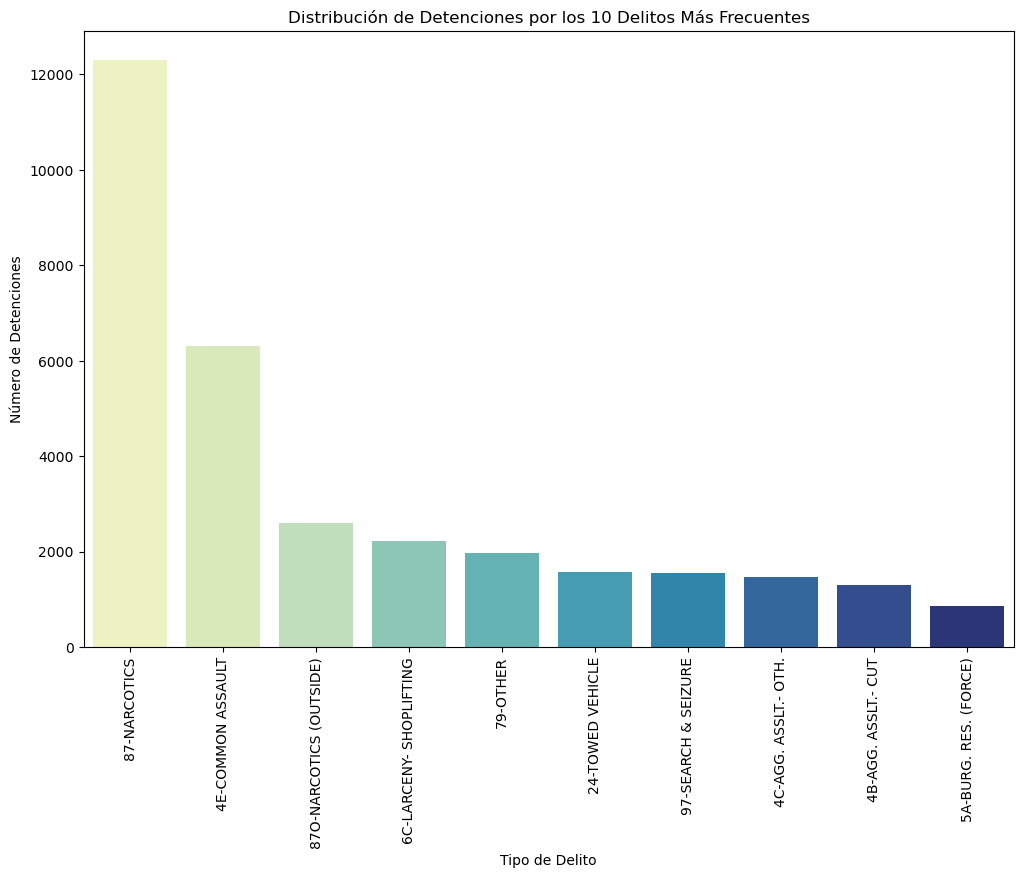

In [29]:
# Calcular los 10 delitos más frecuentes excluyendo 'Unknown Offense'

# Eliminar filas con 'Unknown Offense'
df_uo = df[~df['IncidentOffense'].str.strip().str.lower().eq('unknown offense')]

top_10_offenses = df_uo['IncidentOffense'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo estos delitos
filtered_df = df_uo[df_uo['IncidentOffense'].isin(top_10_offenses)]

# Crear el countplot de detenciones por tipo de delito para los 10 delitos más frecuentes
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df, x='IncidentOffense', order=top_10_offenses, palette='YlGnBu')
plt.title('Distribución de Detenciones por los 10 Delitos Más Frecuentes')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Delito')
plt.ylabel('Número de Detenciones')
plt.show()

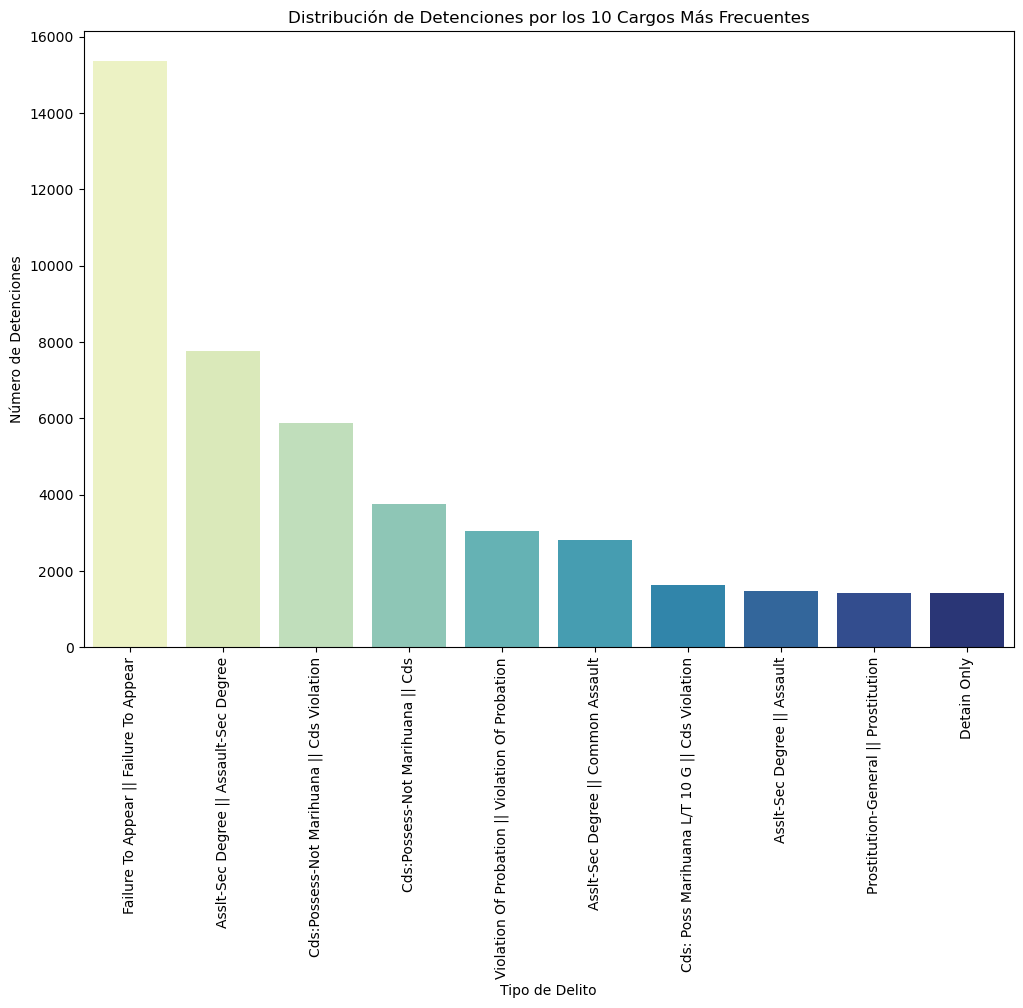

In [31]:
# Eliminar filas con 'Unknown Offense'
df_uc = df[~df['ChargeDescription'].str.strip().str.lower().eq('unknown charge')]

# Calcular los 10 delitos más frecuentes excluyendo 'Unknown Offense'
top_10_offenses = df_uc['ChargeDescription'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo estos delitos
ChargeDescription_df = df_uc['ChargeDescription'].isin(top_10_offenses)

# Crear el countplot de detenciones por tipo de delito para los 10 delitos más frecuentes
plt.figure(figsize=(12, 8))
sns.countplot(data=df_uc, x='ChargeDescription', order=top_10_offenses, palette='YlGnBu')
plt.title('Distribución de Detenciones por los 10 Cargos Más Frecuentes')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Delito')
plt.ylabel('Número de Detenciones')
plt.show()

In [32]:
# Eliminar filas con 'Other'
df_OffenseCategory = df[~df['OffenseCategory'].str.strip().str.lower().eq('other')]

# # Calcular los 10 delitos más frecuentes
top_10_offenses = df_OffenseCategory['OffenseCategory'].value_counts().nlargest(10).index

# Countplot de detenciones por tipo de delito para los 10 delitos más frecuentes
plt.figure(figsize=(12, 5))
sns.countplot(data=df_OffenseCategory, x='OffenseCategory', order=top_10_offenses, palette='YlGnBu')
plt.title('Distribución de Detenciones por los 10 Cargos Más Frecuentes')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Delito')
plt.ylabel('Número de Detenciones')
plt.show()

NameError: name 'df' is not defined

In [111]:
df_OffenseCategory.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43467 entries, 0 to 130708
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Arrest             43466 non-null  float64       
 1   Age                43463 non-null  float64       
 2   Sex                43467 non-null  object        
 3   Race               43467 non-null  object        
 4   ArrestDate         43467 non-null  datetime64[ns]
 5   ArrestTime         43467 non-null  object        
 6   ArrestLocation     37770 non-null  object        
 7   IncidentOffense    43467 non-null  object        
 8   IncidentLocation   43277 non-null  object        
 9   Charge             42758 non-null  object        
 10  ChargeDescription  43366 non-null  object        
 11  District           37810 non-null  object        
 12  Post               37805 non-null  float64       
 13  Neighborhood       37807 non-null  object        
 14  Location 1

In [133]:
print(df_uo['IncidentOffense'].unique())

['4ECOMMON ASSAULT' '6CLARCENY- SHOPLIFTING' '5ABURG. RES. (FORCE)'
 '3CKROBB COMM-KNIFE' '4AAGG. ASSLT.- GUN' '3KROBB RES. (UA)'
 '4CAGG. ASSLT.- OTH.' '6DLARCENY- FROM AUTO' '6JLARCENY- OTHER'
 '4BAGG. ASSLT.- CUT' '4DAGG. ASSLT.- HAND' '75DESTRUCT. OF PROPERTY'
 '58INJURED PERSON' '6GLARCENY- FROM BLDG.' '5BBURG. RES. (ATT.)'
 '7ASTOLEN AUTO' '23UNAUTHORIZED USE' '3PROBB MISC. (UA)'
 '3DROBB COMM. (UA)' '4FASSAULT BY THREAT' '3BROBB HIGHWAY (UA)'
 '5CBURG. RES. (NOFORCE)' '49FAMILY DISTURBANCE' '54ARMED PERSON'
 '3GOROBB CONV STORE-OTHER WPN' '3AFROBB HWY-FIREARM' '87NARCOTICS'
 '115TRESPASSING' '5DBURG. OTH. (FORCE)' '67CHILD ABUSE-PHYSICAL'
 '5EBURG. OTH. (ATT.)' '55APROSTITUTION' '1AMURDER'
 '3COROBB COMM-OTHER WPN' '55DISORDERLY PERSON' '3JKROBB RESIDENCE-KNIFE'
 '2ARAPE (FORCE)' '3NFROBB MISC-FIREARM' '3AJFROBB CARJACK-FIREARM'
 '6FLARCENY- BICYCLE' '118BURGLARY - FOURTH DEGREE' '3CFROBB COMM-FIREARM'
 '3AKROBB HWY-KNIFE' '3AOROBB HWY-OTHER WPN' '6BLARCENY- PURSE SNATCH'
 '79OT

In [131]:
df['OffenseCategory'].unique()

array(['Violent Crimes', 'Other', 'Property Crimes', 'Robbery',
       'Medical Emergencies', 'Domestic Crimes', 'Weapons Violations',
       None, 'Drug Offenses', 'Child Abuse', 'Public Order Crimes',
       'Sex Crimes', 'Administrative', 'Animal Crimes',
       'Traffic Violations', 'Mental Health', 'Investigations', 'Arson',
       'Alcohol Violations', 'Fraud', 'Obstruction of Justice',
       'Fire Incidents', 'Environmental Violations', 'Threats',
       'Human Trafficking'], dtype=object)

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130713 entries, 0 to 130712
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Arrest             123699 non-null  float64       
 1   Age                130685 non-null  float64       
 2   Sex                130713 non-null  object        
 3   Race               130713 non-null  object        
 4   ArrestDate         130713 non-null  datetime64[ns]
 5   ArrestTime         130713 non-null  object        
 6   ArrestLocation     78595 non-null   object        
 7   IncidentOffense    130713 non-null  object        
 8   IncidentLocation   76987 non-null   object        
 9   Charge             114255 non-null  object        
 10  ChargeDescription  130211 non-null  object        
 11  District           78601 non-null   object        
 12  Post               78583 non-null   float64       
 13  Neighborhood       78595 non-null   object  

In [36]:
df

,Arrest,Age,Sex,Race,ArrestDate,ArrestTime,ArrestLocation,IncidentOffense,IncidentLocation,Charge,ChargeDescription,District,Post,Neighborhood,Location 1,Year,Month,DayOfWeek,OffenseCategory
0,16160529.0,54.0,M,B,2016-11-12,22:35,3500 PELHAM AVE,4ECOMMON ASSAULT,3500 PELHAM AVE,1 1415,COMMON ASSAULT,Northeastern,432.0,Belair-Edison,"(39.3208685519, -76.5652449141)",2016,11,5,Violent Crimes
1,16160490.0,22.0,M,B,2016-11-12,21:49,300 S LOUDON AVE,UNKNOWN OFFENSE,300 S LOUDON AVE,4 3550,POSSESSION,Southwestern,833.0,Irvington,"(39.2811486601, -76.6821278085)",2016,11,5,Other
2,16160487.0,31.0,M,B,2016-11-12,21:40,NaN,UNKNOWN OFFENSE,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,2016,11,5,Other
3,16160485.0,31.0,M,B,2016-11-12,20:30,NaN,UNKNOWN OFFENSE,NaN,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,2016,11,5,Other
4,16160481.0,33.0,M,B,2016-11-12,19:45,NaN,UNKNOWN OFFENSE,NaN,2 0480,MOTOR VEH/UNLAWFUL TAKING,NaN,NaN,NaN,NaN,2016,11,5,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130708,13610381.0,42.0,M,U,2013-01-01,00:10,200 LIGHT ST,4B-AGG. ASSLT.- CUT,200 Light St,1 1415,Asslt-Sec Degree || Assault,Central,112.0,Downtown West,"(39.2863699122, -76.6135565156)",2013,1,1,Violent Crimes
130709,13610390.0,33.0,M,B,2013-01-01,00:10,NaN,UNKNOWN OFFENSE,NaN,NaN,Fta,NaN,NaN,NaN,NaN,2013,1,1,Other
130710,13610403.0,37.0,M,B,2013-01-01,00:05,2700 E BIDDLE ST,79-OTHER,2300 E Biddle St,1 1609,Firearm Poss W/Fel Convict || Hgv,Eastern,333.0,Biddle Street,"(39.3048485722, -76.5794082583)",2013,1,1,Other
130711,13610402.0,46.0,M,B,2013-01-01,00:05,2700 E BIDDLE ST,79-OTHER,2300 E Biddle St,1 5212,Handgun On Person || Handgun Violation,Eastern,333.0,Biddle Street,"(39.3048485722, -76.5794082583)",2013,1,1,Other


In [37]:
# Modelado Predictivo

In [38]:
# Para intentar predecir que delitos pasarán, dónde pasarán y quiénes los cometerán
# Si supiesemos el orígen del arrestado podríamos aplicar políticas sociales en determinados barrios por ejemplo

In [39]:
# Random Forest (clasificación)

In [40]:
# # Preprocesamiento para modelado
# df_model = df.dropna(subset=['IncidentOffense', 'Age', 'Sex', 'Race'])
# X = df_model[['Age', 'Sex', 'Race', 'District', 'Neighborhood']]
# y = df_model['IncidentOffense']

In [41]:
# # Convertir variables categóricas a numéricas
# X = pd.get_dummies(X, drop_first=True)


In [42]:
# # Dividir en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# # Entrenar un modelo de Random Forest
# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

In [44]:
# # Evaluar el modelo
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))